In [56]:
import numpy as np
import pandas as pd
from linearmodels.datasets import birthweight
from statsmodels.api import add_constant
from linearmodels.iv import IV2SLS
from sklearn.datasets import fetch_california_housing

In [43]:
X,y = fetch_california_housing(return_X_y=True,as_frame=True)
data = X
data['target'] = y

In [44]:
data.head(3)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521


In [45]:
data = add_constant(data)

In [46]:
data.head(3)

,const,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,1.0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,1.0,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,1.0,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521


In [50]:
data.corr()

,const,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
const,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MedInc,NaN,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,NaN,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,NaN,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,NaN,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,NaN,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,NaN,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,NaN,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,NaN,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
target,NaN,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


In [55]:
res = IV2SLS(data.HouseAge, data[["const", "Population"]], None, None).fit(
    cov_type="unadjusted"
)
print(res)

                            OLS Estimation Summary                            
Dep. Variable:               HouseAge   R-squared:                      0.0878
Estimator:                        OLS   Adj. R-squared:                 0.0877
No. Observations:               20640   F-statistic:                    1985.6
Date:                Tue, Mar 07 2023   P-value (F-stat)                0.0000
Time:                        23:45:03   Distribution:                  chi2(1)
Cov. Estimator:            unadjusted                                         
                                                                              
                             Parameter Estimates                              
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
const          33.333     0.1345     247.81     0.0000      33.069      33.596
Population    -0.0033  7.388e-05    -44.561     0.00

**The first stage regresses the age of the house and population density, as it could be obvious that the areas with high population density would have older homes. But the relationship is weak!**

In [54]:
res = IV2SLS(np.log(data.target), data.const, data.MedInc, data[['HouseAge','AveRooms','Latitude']]).fit(
    cov_type="unadjusted"
)
print(res)


                          IV-2SLS Estimation Summary                          
Dep. Variable:                 target   R-squared:                      0.4009
Estimator:                    IV-2SLS   Adj. R-squared:                 0.4008
No. Observations:               20640   F-statistic:                    979.30
Date:                Tue, Mar 07 2023   P-value (F-stat)                0.0000
Time:                        23:44:30   Distribution:                  chi2(1)
Cov. Estimator:            unadjusted                                         
                                                                              
                             Parameter Estimates                              
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
const          0.0180     0.0180     1.0043     0.3152     -0.0172      0.0533
MedInc         0.1431     0.0046     31.294     0.00

**Using the 2SLS Model we get the R2 around 0.4 and with the F-statistic nearly half of previous value, the 2SLS can be estimated, although substantial caution is warranted to interpret the results.**

#### **LogisticRegression:**

**We use the credit default prediction dataset**

In [57]:
df2 = pd.read_csv('UCI_Credit_Card.csv')

In [58]:
df2.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [59]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [77]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt

In [66]:
X_new = df2.drop('default.payment.next.month',axis=1)
y_new = df2['default.payment.next.month']

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X_new,y_new,test_size=0.2,random_state=42)

In [68]:
log_reg = sm.Logit(y_train,X_train).fit()

print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.465638
         Iterations 7
                               Logit Regression Results                               
Dep. Variable:     default.payment.next.month   No. Observations:                24000
Model:                                  Logit   Df Residuals:                    23976
Method:                                   MLE   Df Model:                           23
Date:                        Wed, 08 Mar 2023   Pseudo R-squ.:                  0.1201
Time:                                00:00:38   Log-Likelihood:                -11175.
converged:                               True   LL-Null:                       -12700.
Covariance Type:                    nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ID         -2.484e-06   1.91e-06     -1.301 

**LogisticRegression uses Maximum Likelihood Estimate.**

In [69]:
#Prediction

yhat = log_reg.predict(X_test)
y_pred = list(map(round, yhat))

In [71]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      4687
           1       0.69      0.24      0.35      1313

    accuracy                           0.81      6000
   macro avg       0.75      0.60      0.62      6000
weighted avg       0.79      0.81      0.77      6000



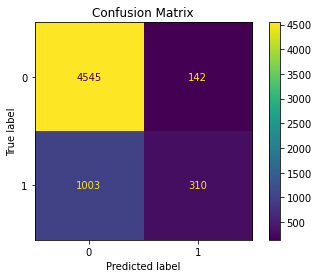

In [80]:
con_mat = confusion_matrix(y_test,y_pred)

ConfusionMatrixDisplay(con_mat).plot()
plt.title("Confusion Matrix")
plt.show()

**Thus we get 81% accuracy using simple Logistic Regression, this can be further improved by using LogisticRegression with cross-validation and more hyperparameter-tuning.**